<a href="https://colab.research.google.com/github/Sallb679/SafeGraph-Analysis/blob/main/Econ433_proj2_Boubacar_Sall_Chili's_Grill_%26_Bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am importing the necessary librariesand loading my files into the notebook


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tabulate import tabulate

In [ ]:
!pip install geoplot
!pip install mapclassify

Part 1: Verify your long data

Question 1 (1 point): In one code cell, show me all the code you used for creating the long data from the raw data (import raw data, subset, clean date_range_start variable, split visits_by_day, reshape data, convert dailyvisits to integer, create dayofweek, manyvisits, core_biz_area, and geographic variables.).


In [ ]:
# Define the name of the restaurant chain
# restaurant_chain_name = "Chili's Grill & Bar"

# Initialize an empty list to store the filtered Data
# filtered_data = []

# Loop through the years from 2018 to 2022
# for year in range(2018, 2023):
#     # Generate the file path for the current year using an f-string
#     file_path = f'/content/drive/MyDrive/ECON_433_Project_1_data/' \
#                  f'weekly_patterns_{year}_sample.csv.zip'

#     # Load the dataset
#     data = pd.read_csv(file_path, compression='zip')

#     # Filter rows where the restaurant chain matches
#     filtered_df = data[data['brands'] == restaurant_chain_name]

#     # Append the filtered DataFrame to the list
#     filtered_data.append(filtered_df)

# # Concatenate all the filtered DataFrames into one DataFrame
# concatenated_data = pd.concat(filtered_data)

# # Print the total number of observations
# total_observations = len(concatenated_data)
# print(f"Total number of observations for "
#       f"{restaurant_chain_name}: {total_observations}")

# # Check data types of each column in the concatenated DataFrame
# print(concatenated_data.dtypes)

# # Count unique places using 'placekey'
# unique_places = concatenated_data['placekey'].nunique()
# print(f"Number of unique places: {unique_places}")

# # Save the wide sample to a CSV file
# concatenated_data.to_csv('/content/drive/MyDrive/ECON_433_Project_1_data/'
#                          'chilis_wide_sample.csv', index=False)

# # Remove timezone information directly from 'date_range_start'
# and 'date_range_end' columns
# concatenated_data['date_range_start'] = concatenated_data['date_range_start'] \
#     .str.replace(r'([+-]\d{2}:\d{2})', '', regex=True)
# concatenated_data['date_range_end'] = concatenated_data['date_range_end'] \
#     .str.replace(r'([+-]\d{2}:\d{2})', '', regex=True)

# # Convert the cleaned date strings back to datetime format
# concatenated_data['date_range_start'] = pd.to_datetime(
#     concatenated_data['date_range_start'], errors='coerce')
# concatenated_data['date_range_end'] = pd.to_datetime(
#     concatenated_data['date_range_end'], errors='coerce')

# # Check for invalid dates
# invalid_dates_start = concatenated_data['date_range_start'].isna().sum()
# invalid_dates_end = concatenated_data['date_range_end'].isna().sum()

# # Print out how many invalid dates were found
# print(f"Invalid 'date_range_start' entries: {invalid_dates_start}")
# print(f"Invalid 'date_range_end' entries: {invalid_dates_end}")

# # Find the earliest and latest valid dates
# beginning_date = concatenated_data['date_range_start'].min()
# ending_date = concatenated_data['date_range_end'].max()

# # Print the results
# print(f"Beginning date in the wide sample: {beginning_date}")
# print(f"Ending date in the wide sample: {ending_date}")

# # Remove brackets and split the string into a list of integers
# concatenated_data['visits_by_day'] = concatenated_data['visits_by_day'] \
#     .str.strip("[]")  # Remove brackets
# daily_visits = concatenated_data['visits_by_day'].str.split(',',
#     expand=True).astype(int)  # Split and convert to int

# # Assign to new columns
# concatenated_data[['dailyvisits1', 'dailyvisits2', 'dailyvisits3',
#                    'dailyvisits4', 'dailyvisits5', 'dailyvisits6',
#                    'dailyvisits7']] = daily_visits

# # Check the number of columns in the wide sample
# num_columns = concatenated_data.shape[1]
# print(f"Total number of variables in the wide sample now: {num_columns}")

# # Step 1: Reshape the DataFrame from wide to long format
# long_sample = pd.melt(concatenated_data,
#                       id_vars=['placekey', 'city', 'region',
#                                'date_range_start', 'date_range_end',
#                                'raw_visit_counts', 'visits_by_day',
#                                'safegraph_brand_ids', 'naics_code',
#                                'postal_code', 'brands'],
#                       value_vars=['dailyvisits1', 'dailyvisits2',
#                                   'dailyvisits3', 'dailyvisits4',
#                                   'dailyvisits5', 'dailyvisits6',
#                                   'dailyvisits7'],
#                       var_name='day',
#                       value_name='dailyvisits')

# # Step 2: Convert the 'dailyvisits' column to integer
# long_sample['dailyvisits'] = long_sample['dailyvisits'].astype(int)

# # Step 3: Final count of observations after resolving issues
# num_observations_final = long_sample.shape[0]
# print(f"Number of observations: {num_observations_final}")

# Step 1: Extract the year from the start date
# long_sample['year'] = long_sample['date_range_start'].dt.year

# Step 2: Aggregate data by year
# yearly_summary = long_sample.groupby('year').agg(
#     start_date=('date_range_start', 'min'),
#     end_date=('date_range_end', 'max'),
#     num_observations=('dailyvisits', 'size'),
#     mean_dailyvisits=('dailyvisits', 'mean')
# ).reset_index()

# Convert the mean_dailyvisits to two decimal places
# and format the dates
# yearly_summary['mean_dailyvisits'] = yearly_summary['mean_dailyvisits'].round(2)
# yearly_summary['start_date'] = yearly_summary['start_date'].dt.strftime('%Y-%m-%d')
# yearly_summary['end_date'] = yearly_summary['end_date'].dt.strftime('%Y-%m-%d')

# Step 4: Display the summary table using tabulate
# print(tabulate(yearly_summary, headers='keys', tablefmt='grid'))

# Step 1: Create a date variable based on the start date
# and day number
# long_sample['date'] = long_sample['date_range_start'] + pd.to_timedelta(
#     long_sample['day'].str.extract('(\d+)')[0].astype(int) - 1, unit='d'
# )

# Step 2: Define the dayofweek variable (1=Monday, ..., 7=Sunday)
# long_sample['dayofweek'] = long_sample['date'].dt.dayofweek + 1

# Step 3: Aggregate dailyvisits by dayofweek
# dayofweek_summary = long_sample.groupby('dayofweek').agg(
#     num_observations=('dailyvisits', 'size'),
#     mean_dailyvisits=('dailyvisits', 'mean')
# ).reset_index()

# Map numeric dayofweek to actual day names
# day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
#              4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
# dayofweek_summary['dayofweek_name'] = dayofweek_summary['dayofweek'].map(day_names)

# Format mean_dailyvisits to two decimal places
# dayofweek_summary['mean_dailyvisits'] = dayofweek_summary['mean_dailyvisits'].round(2)

# Step 4: Determine which day has the highest average daily visits
# highest_avg_day = dayofweek_summary.loc[dayofweek_summary['mean_dailyvisits'].idxmax()]

# Step 5: Display the summary table using tabulate
# print(tabulate(dayofweek_summary[['dayofweek_name',
#                                     'num_observations',
#                                     'mean_dailyvisits']],
#                headers=['Day of Week', 'Num Observations',
#                         'Mean Daily Visits'], tablefmt='grid'))

# Step 6: Display the highest average daily visits
# print(f"\nThe day with the highest average daily visits is "
#       f"{highest_avg_day['dayofweek_name']} with an average of "
#       f"{highest_avg_day['mean_dailyvisits']:.2f} visits.")

# Step 1: Calculate mean and standard deviation for weekdays
# (Monday to Thursday) and weekends (Friday to Sunday)
# weekday_data = long_sample[long_sample['dayofweek'] <= 4]['dailyvisits']
# weekend_data = long_sample[long_sample['dayofweek'] >= 5]['dailyvisits']

# Mean and standard deviation for weekdays
# weekday_mean = weekday_data.mean()
# weekday_std = weekday_data.std()

# Mean and standard deviation for weekends
# weekend_mean = weekend_data.mean()
# weekend_std = weekend_data.std()

# Step 2: Define thresholds as mean + 1 standard deviation
# weekday_threshold = weekday_mean + weekday_std
# weekend_threshold = weekend_mean + weekend_std

# Step 3: Create the manyvisits variable using the data-driven thresholds
# long_sample['manyvisits'] = long_sample.apply(
#     lambda row: 1 if (row['dailyvisits'] > weekend_threshold
#                       if row['dayofweek'] >= 5
#                       else row['dailyvisits'] > weekday_threshold) else 0,
#     axis=1
# )

# Step 4: Choose a geographic variable (e.g., region)
# geographic_var = 'region'

# Step 5: Tabulate the number of observations for each
# combination of manyvisits and the geographic variable
# tabulation = long_sample.groupby([geographic_var, 'manyvisits']).size().unstack(fill_value=0)

# Add a column for total observations in each geographic unit
# tabulation['total_observations'] = tabulation.sum(axis=1)

# Add a column for the percentage of manyvisits=1 in each
# geographic unit, rounded to 2 decimal places
# tabulation['percent_manyvisits_1'] = ((tabulation[1] /
#                                         tabulation['total_observations']) * 100).round(2)

# Step 6: Find the geographic unit with the highest number of
# manyvisits=1
# highest_manyvisits_1 = tabulation[1].idxmax()
# highest_manyvisits_1_count = tabulation[1].max()

# Step 7: Find the geographic unit with the highest percentage
# of manyvisits=1
# highest_percent_manyvisits_1 = tabulation['percent_manyvisits_1'].idxmax()
# highest_percent_manyvisits_1_value = tabulation['percent_manyvisits_1'].max()

# Step 8: Display the tabulation and results using tabulate
# tabulated_data = tabulation.reset_index()
# print(tabulate(tabulated_data, headers='keys', tablefmt='grid',
#                 showindex=False))

# Step 9: Display the highest number and percentage of manyvisits=1
# print(f"\nThe geographic unit with the highest # of observations "
#       f"with manyvisits=1 is {highest_manyvisits_1} with "
#       f"{highest_manyvisits_1_count} observations.")
# print(f"The geographic unit with the highest percentage of observations "
#       f"with manyvisits=1 is {highest_percent_manyvisits_1} with "
#       f"{highest_percent_manyvisits_1_value:.2f}% observations.")

# Step 1: Calculate the threshold for core business areas
# (e.g., 75th percentile of observations by postal_code)
# obs_per_postal_code = long_sample.groupby('postal_code')['dailyvisits'].size()
# threshold = np.percentile(obs_per_postal_code, 75)

# Step 2: Define the core_biz_area variable (1 if postal_code
# has observations above the threshold, 0 otherwise)
# long_sample['core_biz_area'] = long_sample['postal_code'].apply(
#     lambda x: 1 if obs_per_postal_code[x] > threshold else 0
# )

# Step 3: Aggregate data by core_biz_area
# core_biz_summary = long_sample.groupby('core_biz_area').agg(
#     num_observations=('dailyvisits', 'size'),
#     mean_dailyvisits=('dailyvisits', 'mean')
# ).reset_index()

# Step 4: Display the aggregated data
# print(tabulate(core_biz_summary, headers='keys', tablefmt='grid',
#                 showindex=False))

# Step 5: Interpret results (example reasoning)
# core_area_visits = core_biz_summary[core_biz_summary['core_biz_area'] == 1]['mean_dailyvisits'].values[0]
# non_core_area_visits = core_biz_summary[core_biz_summary['core_biz_area'] == 0]['mean_dailyvisits'].values[0]

# print(f"Core areas have an average of {core_area_visits:.2f} daily visits "
#       f"compared to {non_core_area_visits:.2f} in non-core areas.")

# long_sample.to_csv('/content/drive/MyDrive/ECON_433_Project_2_data/long_sample.csv', index=False)


Answer the following questions in your long data:

What are the unique values of your dayofweek variable?
Generate a variable weekend = 1 if it is Saturday or Sunday, and 0 otherwise. How many observations do you have for weekend and weekdays? (This is a sanity check of your data.)
Save your long data to a csv file, specify index  = False.


In [ ]:
# Step 1: Load the CSV file into a DataFrame named 'long_sample'
file_path = '/content/drive/MyDrive/ECON_433_Project_2_data/long_sample.csv'
long_sample = pd.read_csv(file_path)

# Step 2: Check the unique values in the 'dayofweek' variable
unique_dayofweek = long_sample['dayofweek'].unique()
print(f"Unique values in dayofweek: {unique_dayofweek}")

# Step 3: Create a new 'weekend' variable, where 1 = Saturday/Sunday, and 0 = other days
long_sample['weekend'] = long_sample['dayofweek'].apply(lambda x: 1 if x in [6, 7] else 0)

# Step 4: Count how many observations are on weekends (weekend=1) and weekdays (weekend=0)
weekend_count = long_sample['weekend'].sum()  # Sum of weekend=1 gives number of weekend observations
weekday_count = len(long_sample) - weekend_count  # Total observations minus weekend_count gives weekday count

# Display the results
print(f"Number of weekend observations: {weekend_count}")
print(f"Number of weekday observations: {weekday_count}")


Unique values in dayofweek: [1 2 3 4 5 6 7]
Number of weekend observations: 112484
Number of weekday observations: 281210


The data is saved in my file directory I have just loaded it and saved it to the long_sample variable.

In [ ]:
long_sample.head()

,placekey,city,region,date_range_start,date_range_end,raw_visit_counts,visits_by_day,safegraph_brand_ids,naics_code,postal_code,brands,day,dailyvisits,year,date,dayofweek,manyvisits,core_biz_area,weekend
0,222-222@5pr-4pg-9fz,Lees Summit,MO,2018-12-24,2018-12-31,261,"26,1,43,45,52,53,41",SG_BRAND_072efa4069c7217d82229845c60e6a0d,722511,64081,Chili's Grill & Bar,dailyvisits1,26,2018,2018-12-24,1,0,0,0
1,223-222@8f2-sqt-kj9,Mount Pleasant,TX,2018-08-27,2018-09-03,138,"10,24,14,13,23,24,30",SG_BRAND_072efa4069c7217d82229845c60e6a0d,722511,75455,Chili's Grill & Bar,dailyvisits1,10,2018,2018-08-27,1,0,0,0
2,223-222@5pv-mqc-t5f,Peoria,IL,2018-03-19,2018-03-26,111,"10,10,16,15,21,16,23",SG_BRAND_072efa4069c7217d82229845c60e6a0d,722511,61614,Chili's Grill & Bar,dailyvisits1,10,2018,2018-03-19,1,0,0,0
3,zzw-222@62j-wsq-ysq,Dover,NH,2018-05-07,2018-05-14,113,"13,15,18,9,26,19,13",SG_BRAND_072efa4069c7217d82229845c60e6a0d,722511,3820,Chili's Grill & Bar,dailyvisits1,13,2018,2018-05-07,1,0,0,0
4,228-222@5qv-x6c-gzf,Euless,TX,2018-02-12,2018-02-19,175,"26,14,34,9,34,34,24",SG_BRAND_072efa4069c7217d82229845c60e6a0d,722511,76039,Chili's Grill & Bar,dailyvisits1,26,2018,2018-02-12,1,0,0,0


Part 2: Use histograms to describe dailyvisits



Question 2a (1 point): Describe the variable “dailyvisits”.

How many observations do you have?
What are the minimum, maximum, average, and median of this variable?
How many observations have dailyvisits equal to zero?
How many observations have dailyvisits above 100 (including 100)?
How many observations have dailyvisits above 1000 (including 1000)?

In [ ]:
# Step 1: Describe the 'dailyvisits' variable (get summary statistics)
dailyvisits_summary = long_sample['dailyvisits'].describe()

# Step 2: Count the number of observations
num_observations = long_sample['dailyvisits'].count()

# Step 3: Find the number of observations with dailyvisits equal to zero
num_zero_visits = (long_sample['dailyvisits'] == 0).sum()

# Step 4: Find the number of observations with dailyvisits above or equal to 100
num_above_100 = (long_sample['dailyvisits'] >= 100).sum()

# Step 5: Find the number of observations with dailyvisits above or equal to 1000
num_above_1000 = (long_sample['dailyvisits'] >= 1000).sum()

# Step 6: Display the results
print(f"Number of observations: {num_observations}")
print(f"Minimum dailyvisits: {dailyvisits_summary['min']}")
print(f"Maximum dailyvisits: {dailyvisits_summary['max']}")
print(f"Average (mean) dailyvisits: {dailyvisits_summary['mean']:.2f}")
print(f"Median dailyvisits: {dailyvisits_summary['50%']}")
print(f"Number of observations with dailyvisits = 0: {num_zero_visits}")
print(f"Number of observations with dailyvisits >= 100: {num_above_100}")
print(f"Number of observations with dailyvisits >= 1000: {num_above_1000}")


Number of observations: 393694
Minimum dailyvisits: 0.0
Maximum dailyvisits: 819.0
Average (mean) dailyvisits: 26.85
Median dailyvisits: 22.0
Number of observations with dailyvisits = 0: 7547
Number of observations with dailyvisits >= 100: 3421
Number of observations with dailyvisits >= 1000: 0


The output above provides the descriptive stats that were asked for

Question 2b (1 point): Draw a histogram of “dailyvisits” for the whole sample.

On the horizontal axis, mark clearly what range of dailyvisits each bin corresponds to.
Explain why you choose such bin definitions.
Include the proper y axis and title.
(Hint: given the skewness of the distribution of dailyvisits in Question 2a, you may want the whole histogram to focus on a sub-range of dailyvisits, e.g. 0-50. If you decide to do so, explain why you choose this sub-range.)


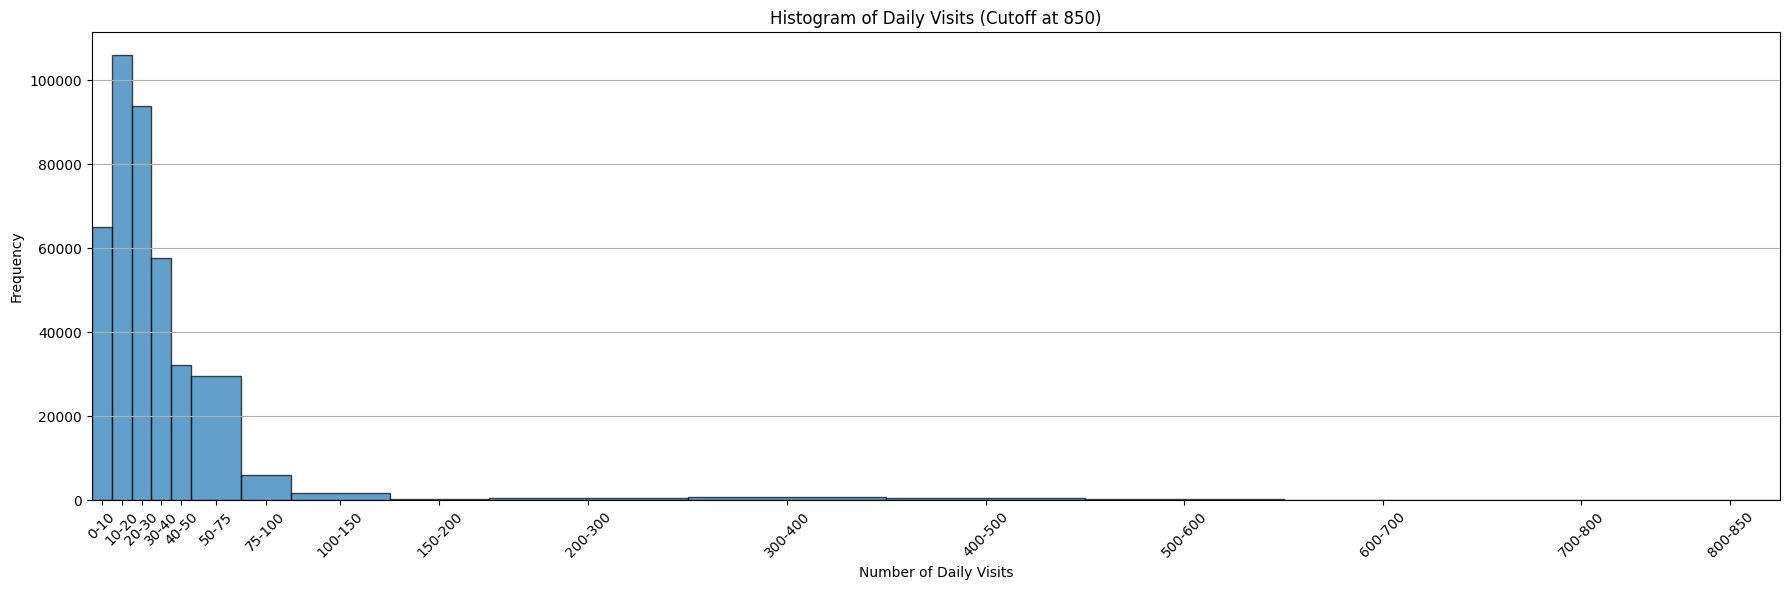

In [ ]:
# Step 1: Draw a histogram of dailyvisits for the whole sample
plt.figure(figsize=(18, 6))

# Step 2: Adjust bin sizes for a right-skewed distribution
# Use smaller bins in the range 0-100, then increase bin width for higher values
bin_ranges = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800, 850]

# Step 3: Plot the histogram with the new bin ranges
plt.hist(long_sample['dailyvisits'], bins=bin_ranges, edgecolor='black', alpha=0.7)

# Step 4: Set custom tick marks and labels for the x-axis
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50',
              '50-75', '75-100', '100-150', '150-200',
              '200-300', '300-400', '400-500',
              '500-600', '600-700', '700-800', '800-850']

# Create tick positions from the bin ranges
tick_positions = [(bin_ranges[i] + bin_ranges[i+1]) / 2 for i in range(len(bin_ranges) - 1)]

# Set the ticks and labels on the x-axis
plt.xticks(ticks=tick_positions, labels=bin_labels, rotation=45)

# Step 5: Set labels and title
plt.xlabel('Number of Daily Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Visits (Cutoff at 850)')

# Step 6: Set x-axis limit to cut off at 850
plt.xlim(0, 850)

# Step 7: Display the plot
plt.grid(axis='y')  # Optionally add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()




Question 2c (1 point): Using the same bin definition as in Question 2b, draw a grouped histogram with “dailyvisits” for all weekdays as one group, and all weekend days as another group:

For clear comparison, you should use one color for the weekday group, and another color for the weekend group. The two sets of bars should appear in the same picture.
Include the proper axis, title and legend.
Comment on at least one difference between the distribution of “dailyvisits” in weekdays and weekends.

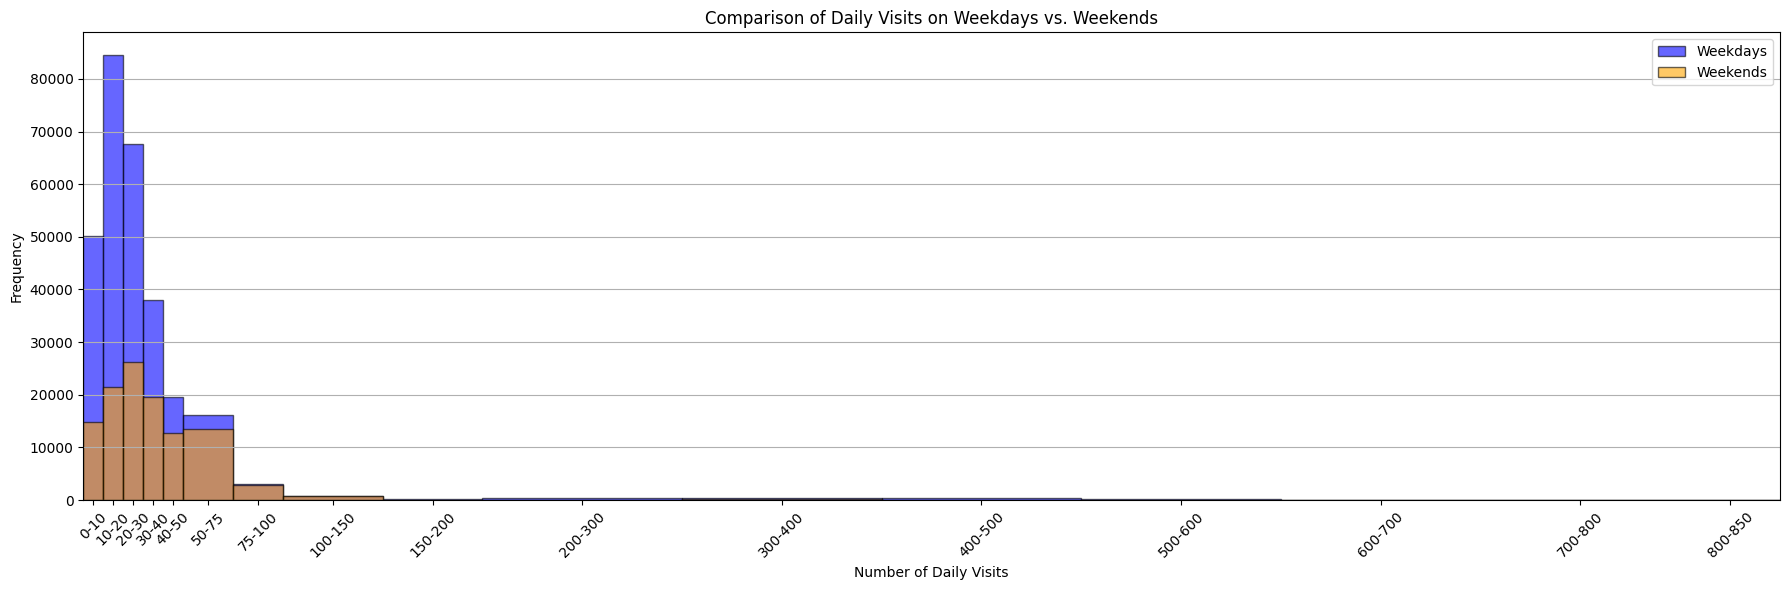

In [ ]:
# Step 1: Define bin ranges as in the previous question for better representation of the skewed data
bin_ranges = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800, 850]

# Step 2: Create separate subsets for weekdays and weekends
weekdays_data = long_sample[long_sample['weekend'] == 0]['dailyvisits']
weekend_data = long_sample[long_sample['weekend'] == 1]['dailyvisits']

# Step 3: Plot the grouped histogram
plt.figure(figsize=(18, 6))

# Plot weekdays
plt.hist(weekdays_data, bins=bin_ranges, alpha=0.6, label='Weekdays', color='blue', edgecolor='black')
# Plot weekends
plt.hist(weekend_data, bins=bin_ranges, alpha=0.6, label='Weekends', color='orange', edgecolor='black')

# Step 4: Set custom tick marks and labels for the x-axis
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50',
              '50-75', '75-100', '100-150', '150-200',
              '200-300', '300-400', '400-500',
              '500-600', '600-700', '700-800', '800-850']

# Create tick positions from the bin ranges
tick_positions = [(bin_ranges[i] + bin_ranges[i + 1]) / 2 for i in range(len(bin_ranges) - 1)]

# Set the ticks and labels on the x-axis
plt.xticks(ticks=tick_positions, labels=bin_labels, rotation=45)

# Step 5: Set x-axis limits to remove the gap
plt.xlim(left=0, right=850)  # Ensure the x-axis starts at 0 and ends at 850

# Step 6: Set labels, title, and legend
plt.xlabel('Number of Daily Visits')
plt.ylabel('Frequency')
plt.title('Comparison of Daily Visits on Weekdays vs. Weekends')
plt.legend()

# Step 7: Display the plot
plt.grid(axis='y')  # Optional: Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Part 3: Pie chart of total visits by day of week



Question 3a (1 point): Calculate the sum of dailyvisits by Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday.

Show the results in a table.  






In [ ]:
# Step 1: Map 'dayofweek' variable to actual weekday names
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
long_sample['day_name'] = long_sample['dayofweek'].map(day_map)

# Step 2: Calculate the sum of dailyvisits for each day of the week
dailyvisits_by_day = long_sample.groupby('day_name')['dailyvisits'].sum().reset_index()

# Step 3: Sort the result to ensure the days are ordered correctly
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dailyvisits_by_day['day_name'] = pd.Categorical(dailyvisits_by_day['day_name'], categories=order, ordered=True)
dailyvisits_by_day = dailyvisits_by_day.sort_values('day_name')

# Step 4: Display the result as a table
print(tabulate(dailyvisits_by_day, headers='keys', tablefmt='grid', showindex=False))


+------------+---------------+
| day_name   |   dailyvisits |
+============+===============+
| Monday     |       1218890 |
+------------+---------------+
| Tuesday    |       1223982 |
+------------+---------------+
| Wednesday  |       1301510 |
+------------+---------------+
| Thursday   |       1379677 |
+------------+---------------+
| Friday     |       1933791 |
+------------+---------------+
| Saturday   |       1939604 |
+------------+---------------+
| Sunday     |       1574828 |
+------------+---------------+


Question 3b (1 point): Draw a pie chart of total dailyvisits across the seven days of week.

Each day of week should appear as a slice in this pie, with a different color. Mark % of total dailyvisits in each slice (or right next to each slice if some slices are too small). By definition, these percentages should add up to 100%. Include proper title and legend.

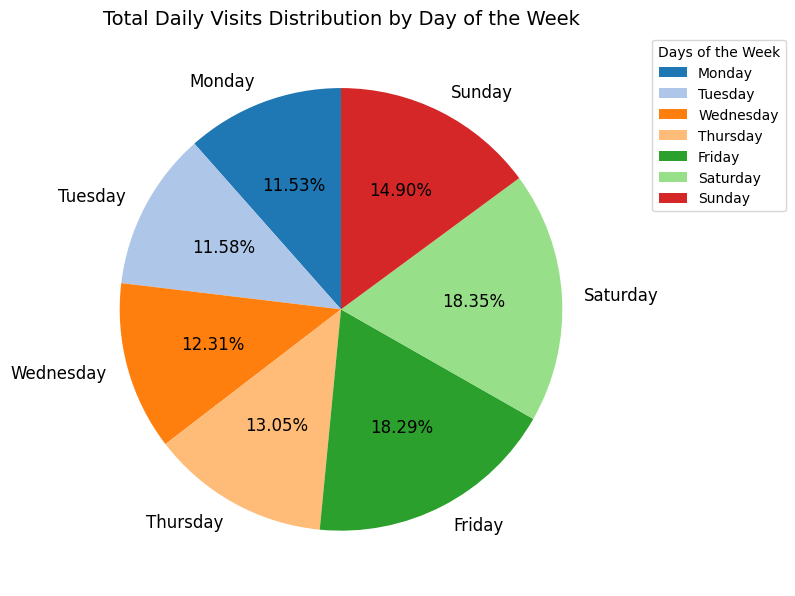

In [ ]:
# Step 1: Calculate the percentage of total dailyvisits for each day
dailyvisits_by_day['percent_visits'] = (dailyvisits_by_day['dailyvisits'] / dailyvisits_by_day['dailyvisits'].sum()) * 100

# Step 2: Create the pie chart with more precision in the percentages
plt.figure(figsize=(8, 8))
colors = plt.get_cmap('tab20').colors  # Use a colormap with enough distinct colors
plt.pie(dailyvisits_by_day['dailyvisits'],
        labels=dailyvisits_by_day['day_name'],
        autopct='%1.2f%%',  # Use two decimal places to reduce rounding error
        colors=colors[:7],  # Use only as many colors as there are days
        startangle=90,
        textprops={'fontsize': 12})  # Text size for better visibility

# Step 3: Add a title
plt.title('Total Daily Visits Distribution by Day of the Week', fontsize=14)

# Step 4: Add a legend
plt.legend(dailyvisits_by_day['day_name'], title="Days of the Week", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the pie chart
plt.tight_layout()
plt.show()


Part 4: Bar chart of average dailyvisits by some geographic variable



Question 4a (1 point): Calculate average dailyvisits by your choice of a geographic variable.

Show the results in a table.
(Hint: you want the table to be readable. If your chain covers over 1000 zip codes, you may think twice whether zip code is the right level of geography you want to use for this table.)






In [ ]:
# Step 1: Calculate the average daily visits by region
avg_dailyvisits_by_region = long_sample.groupby('region')['dailyvisits'].mean().reset_index()

# Step 2: Rename the column for clarity
avg_dailyvisits_by_region.columns = ['region', 'average_dailyvisits']

# Step 3: Sort the results for easier interpretation (descending by average dailyvisits)
avg_dailyvisits_by_region = avg_dailyvisits_by_region.sort_values(by='average_dailyvisits', ascending=False)

# Step 4: Split the dataframe into two parts
first_part = avg_dailyvisits_by_region.head(21).reset_index(drop=True)
second_part = avg_dailyvisits_by_region.iloc[21:].reset_index(drop=True)

# Step 5: Combine both parts into a single dataframe, filling NaN with empty strings
combined_table = pd.concat([first_part, second_part], axis=1).fillna("")

# Step 6: Update column names to reflect only data labels
combined_table.columns = ['Region', 'Average Daily Visits', 'Region', 'Average Daily Visits']

# Step 7: Display the combined table
print(tabulate(combined_table, headers='keys', tablefmt='grid', showindex=False))


+----------+------------------------+----------+------------------------+
| Region   |   Average Daily Visits | Region   |   Average Daily Visits |
+==========+========================+==========+========================+
| MI       |               141.733  | MD       |               21.4013  |
+----------+------------------------+----------+------------------------+
| AR       |                56.0321 | IA       |               20.7474  |
+----------+------------------------+----------+------------------------+
| OH       |                49.5124 | MN       |               20.1626  |
+----------+------------------------+----------+------------------------+
| AL       |                43.0657 | NM       |               19.2414  |
+----------+------------------------+----------+------------------------+
| MO       |                37.738  | WI       |               19.1082  |
+----------+------------------------+----------+------------------------+
| MS       |                34.7285 | 

I chose region as my geographic variable there are still a good amount but it is small enough to look through quickly.

Question 4b (1 point): Draw average dailyvisits in a bar chart, where:

the horizontal axis is your geographic variable, and the vertical axis is average dailyvisits in each geography. On top of each bar, report the value of average dailyvisits for that bar (up to 1 decimal point). Hint: these values should be the same as in your answer to Question 4a, except for rounding error. Include the proper axis and title. Hint: if the geographic variable you choose in Question 4a takes too many values to appear in one graph, you may want to reconsider the geographic variable.

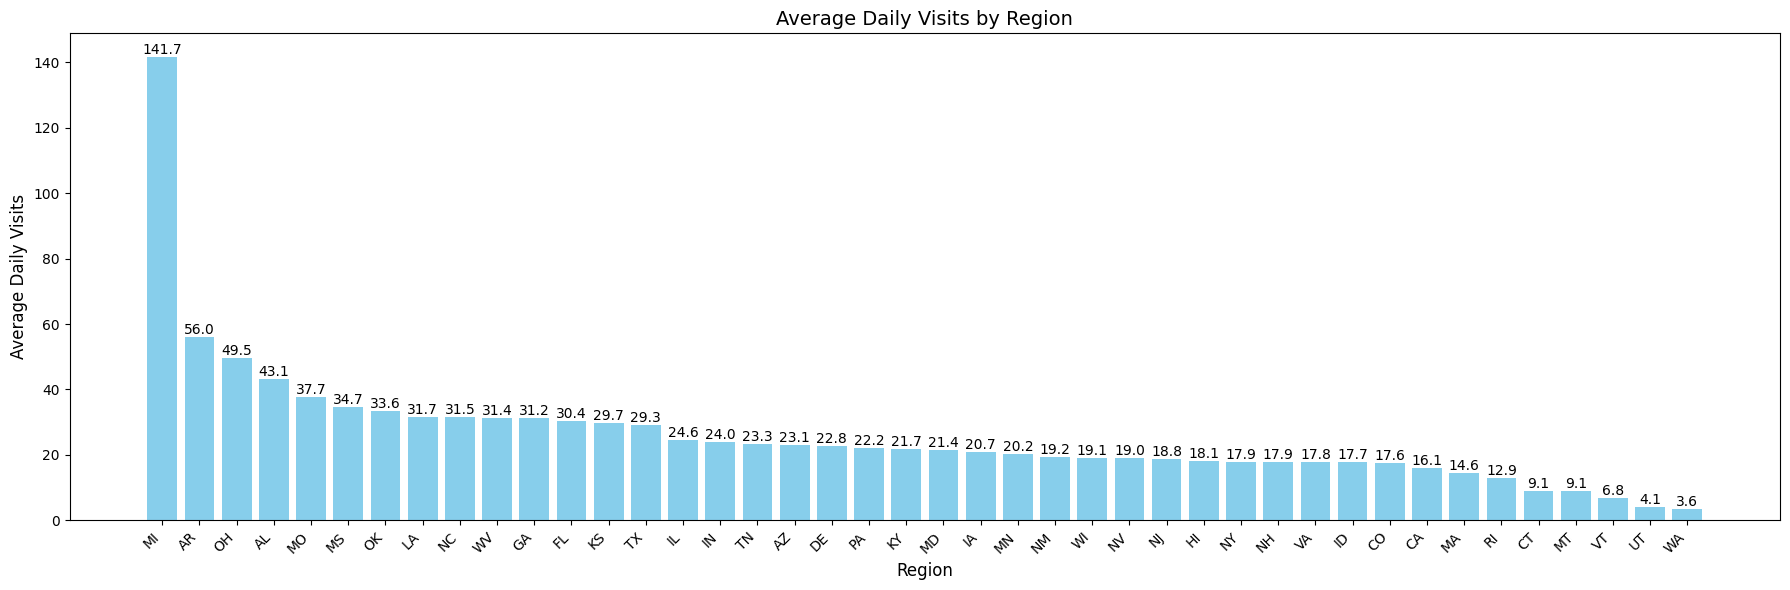

In [ ]:
# Step 1: Calculate the average daily visits by region
avg_dailyvisits_by_region = long_sample.groupby('region')['dailyvisits'].mean().reset_index()
avg_dailyvisits_by_region.columns = ['region', 'average_dailyvisits']
avg_dailyvisits_by_region = avg_dailyvisits_by_region.sort_values(by='average_dailyvisits', ascending=False)

# Step 2: Plot the bar chart
plt.figure(figsize=(18, 6))
bars = plt.bar(avg_dailyvisits_by_region['region'], avg_dailyvisits_by_region['average_dailyvisits'], color='skyblue')

# Step 3: Add the average daily visits value on top of each bar (rounded to 1 decimal place)
for bar in bars:
    yval = bar.get_height()
    # Adjust the vertical position of the text to avoid overlap
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Step 4: Customize the chart with titles and labels
plt.title('Average Daily Visits by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Daily Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate region names for better readability
plt.tight_layout()

# Step 5: Show the chart
plt.show()


Question 4c (1 point): Draw another bar chart of average dailyvisits:

With the same geographic variable on the horizontal axis as in Question 4b.
plot two sets of bars, one set includes all days up to March 13, 2020 (including March 13); the other set includes all days after March 13, 2020. (March 13 is the day that US announced national emergency because of COVID). The two sets of bars should use different colors for clear comparison.
Include the proper axis, title and legend.
Comment on at least two differences between the two sets in the bar chart.

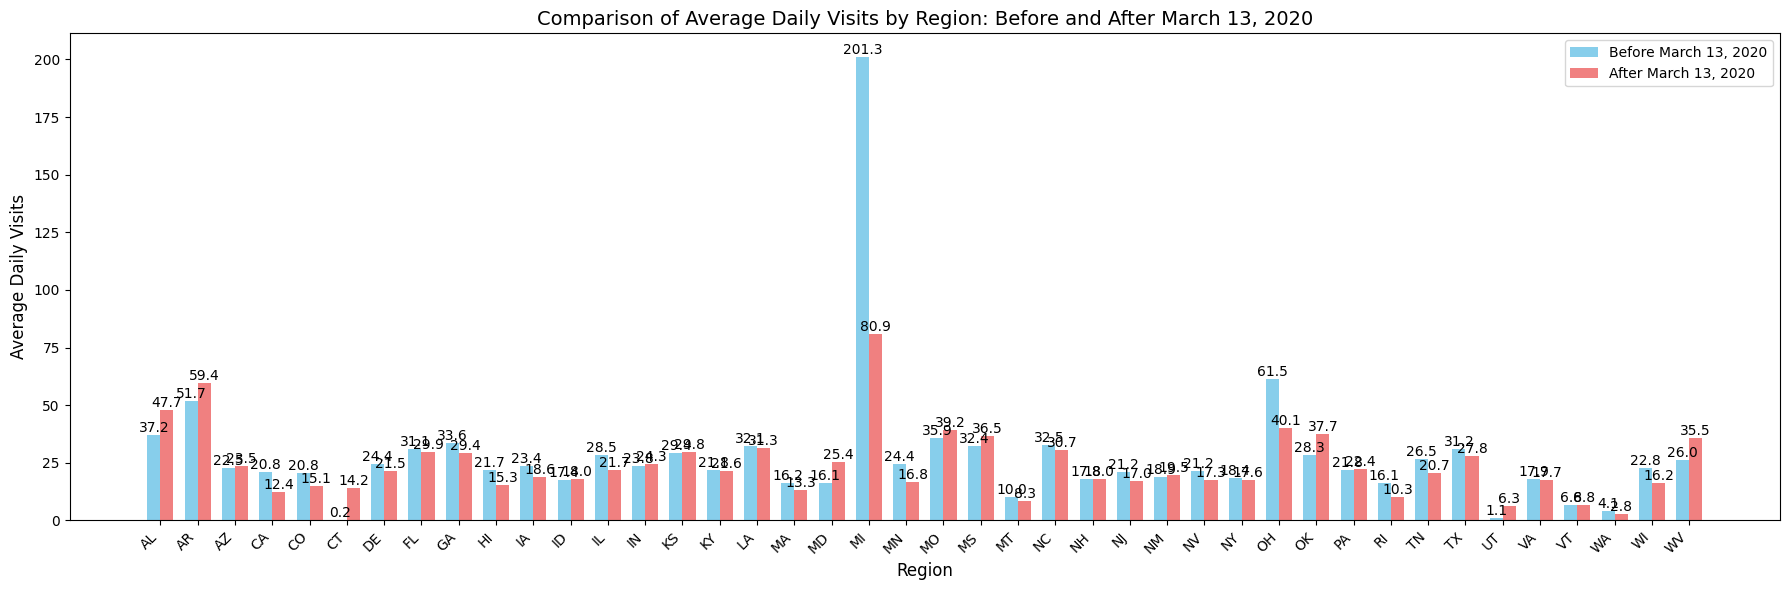

In [ ]:
# Step 1: Convert the 'date' column to datetime format
long_sample['date'] = pd.to_datetime(long_sample['date'])

# Step 2: Define the cutoff date for the national emergency (March 13, 2020)
cutoff_date = pd.to_datetime('2020-03-13')

# Step 3: Split the data into two groups: before and after March 13, 2020
before_covid = long_sample[long_sample['date'] <= cutoff_date]
after_covid = long_sample[long_sample['date'] > cutoff_date]

# Step 4: Calculate the average daily visits by region for both time periods
avg_dailyvisits_before = (
    before_covid.groupby('region')['dailyvisits']
    .mean()
    .reset_index()
)
avg_dailyvisits_after = (
    after_covid.groupby('region')['dailyvisits']
    .mean()
    .reset_index()
)

# Step 5: Rename columns for clarity
avg_dailyvisits_before.columns = [
    'region', 'average_dailyvisits_before'
]
avg_dailyvisits_after.columns = [
    'region', 'average_dailyvisits_after'
]

# Step 6: Merge the two DataFrames to have both sets of averages in one table
avg_dailyvisits_combined = pd.merge(
    avg_dailyvisits_before,
    avg_dailyvisits_after,
    on='region'
)

# Step 7: Plot the bar chart with two sets of bars (before and after March 13, 2020)
plt.figure(figsize=(18, 6))
bar_width = 0.35  # Set width for the bars

# Position of the bars on the x-axis
r1 = range(len(avg_dailyvisits_combined))
r2 = [x + bar_width for x in r1]  # Shift the second set of bars to the right

# Create the bars
bars1 = plt.bar(
    r1,
    avg_dailyvisits_combined['average_dailyvisits_before'],
    color='skyblue',
    width=bar_width,
    label='Before March 13, 2020'
)
bars2 = plt.bar(
    r2,
    avg_dailyvisits_combined['average_dailyvisits_after'],
    color='lightcoral',
    width=bar_width,
    label='After March 13, 2020'
)

# Step 8: Add the average dailyvisits value on top of each bar (rounded to 1 decimal place)
for bar in bars1:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 1),
        ha='center',
        va='bottom'
    )

for bar in bars2:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 1),
        ha='center',
        va='bottom'
    )

# Step 9: Customize the chart with titles and labels
plt.title(
    'Comparison of Average Daily Visits by Region: Before and After March 13, 2020',
    fontsize=14
)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Daily Visits', fontsize=12)
plt.xticks(
    [r + bar_width / 2 for r in range(len(avg_dailyvisits_combined))],
    avg_dailyvisits_combined['region'],
    rotation=45,
    ha='right'
)

# Step 10: Add the legend
plt.legend()

# Step 11: Show the chart
plt.tight_layout()
plt.show()


Mchigan Region: Michigan's chain had a noticeable decrease which went from 201.3 to 80.9 which is a significant change in daily visits before and after March 13, 2020.(also CT with an increase however)

Stable Trends: The majority of regions have maintained similar visit patterns, reflecting that the pandemic had minimal impact on their daily traffic.

Part 5: Line chart of dailyvisits by year-month



Question 5a (1 point): Calculate average dailyvisits by month.

Show the results in a table.
(Hint: the number of rows in this table should correspond to the number of unique year-month in your data.)







In [ ]:
# Step 1: Ensure 'date' is in datetime format
long_sample['date'] = pd.to_datetime(long_sample['date'])

# Step 2: Extract year-month from the 'date' column
long_sample['year_month'] = long_sample['date'].dt.to_period('M')

# Step 3: Calculate average daily visits by year-month
avg_dailyvisits_by_month = (
    long_sample.groupby('year_month')['dailyvisits']
    .mean()
    .reset_index()
)

# Step 4: Rename columns for clarity
avg_dailyvisits_by_month.columns = [
    'Year-Month', 'Average Daily Visits'
]

# Step 5: Split the dataframe into three parts
part_size = len(avg_dailyvisits_by_month) // 3
first_part = avg_dailyvisits_by_month.head(part_size).reset_index(drop=True)
second_part = avg_dailyvisits_by_month.iloc[part_size:2 * part_size].reset_index(drop=True)
third_part = avg_dailyvisits_by_month.iloc[2 * part_size:].reset_index(drop=True)

# Step 6: Combine all three parts into a single dataframe, filling NaN with empty strings
combined_table = pd.concat(
    [first_part, second_part, third_part],
    axis=1
).fillna("")

# Step 7: Update column names to reflect only data labels
combined_table.columns = [
    'Year-Month', 'Average Daily Visits',
    'Year-Month', 'Average Daily Visits',
    'Year-Month', 'Average Daily Visits'
]

# Step 8: Display the combined table
print(
    tabulate(
        combined_table,
        headers='keys',
        tablefmt='grid',
        showindex=False
    )
)


+--------------+------------------------+--------------+------------------------+--------------+------------------------+
| Year-Month   | Average Daily Visits   | Year-Month   | Average Daily Visits   | Year-Month   |   Average Daily Visits |
+==============+========================+==============+========================+==============+========================+
| 2018-01      | 17.896250564673995     | 2019-09      | 31.477001703577514     | 2021-05      |               29.9428  |
+--------------+------------------------+--------------+------------------------+--------------+------------------------+
| 2018-02      | 20.89841534612177      | 2019-10      | 30.338445346564427     | 2021-06      |               29.1942  |
+--------------+------------------------+--------------+------------------------+--------------+------------------------+
| 2018-03      | 24.315978994748686     | 2019-11      | 32.73009467639299      | 2021-07      |               29.8483  |
+--------------+--------

Question 5b (1 point): Draw average dailyvisits in a line chart, where:

the horizontal axis is year-month, and the vertical axis is average dailyvisits in each year-month.
Add a vertical line for each beginning of year (in black) amd a vertical line for March 2020 (in red).
Include proper axis, title, legend.






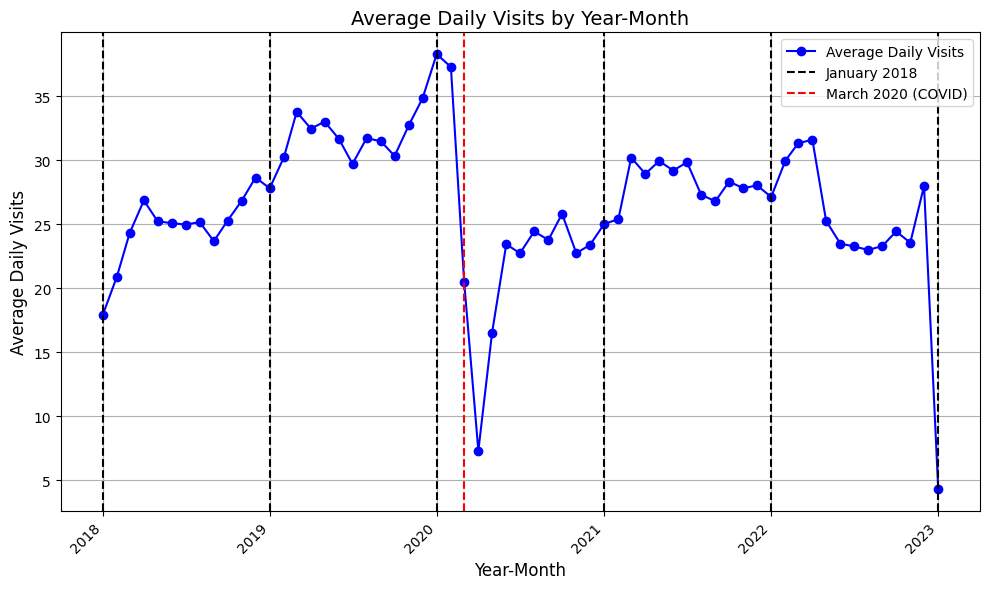

In [ ]:
# Step 1: Extract year-month from the 'date' column
long_sample['year_month'] = long_sample['date'].dt.to_period('M')

# Step 2: Calculate average daily visits by year-month
avg_dailyvisits_by_month = (
    long_sample.groupby('year_month')['dailyvisits']
    .mean()
    .reset_index()
)
avg_dailyvisits_by_month['year_month'] = (
    avg_dailyvisits_by_month['year_month']
    .dt.to_timestamp()  # To ensure correct format for plotting
)

# Step 3: Plot the average daily visits
plt.figure(figsize=(10, 6))
plt.plot(
    avg_dailyvisits_by_month['year_month'],
    avg_dailyvisits_by_month['dailyvisits'],
    '-o',
    color='blue',
    label='Average Daily Visits'
)

# Step 4: Add vertical lines for each year and March 2020
for year in range(
    avg_dailyvisits_by_month['year_month'].dt.year.min(),
    avg_dailyvisits_by_month['year_month'].dt.year.max() + 1
):
    plt.axvline(
        pd.Timestamp(f'{year}-01-01'),
        color='black',
        linestyle='--',
        label=f'January {year}' if year == avg_dailyvisits_by_month['year_month'].dt.year.min() else ""
    )
plt.axvline(
    pd.Timestamp('2020-03-01'),
    color='red',
    linestyle='--',
    label='March 2020 (COVID)'
)

# Step 5: Customize the chart
plt.title('Average Daily Visits by Year-Month', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Daily Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Step 6: Show the plot
plt.show()


Question 5c (1 point): Draw another line plot where:

The horizontal axis is year-month.
This chart should contain four lines:
(1) average dailyvisits;

(2) median dailyvisits;

(3) 25th percentile of dailyvisits, and

(4) 75th percentile of dailyvisits.

Use different colors or line patterns to make sure that readers know which line is for which metric.
Shade the area between the 25th and 75th percentile lines in grey.
Include a vertical line for each beginning of year (in black) and a vertical line for March 2020 (in red).
Include proper axis, title, legend.
Make at least two comments about the visual pattern of dailyvisits in this chart.

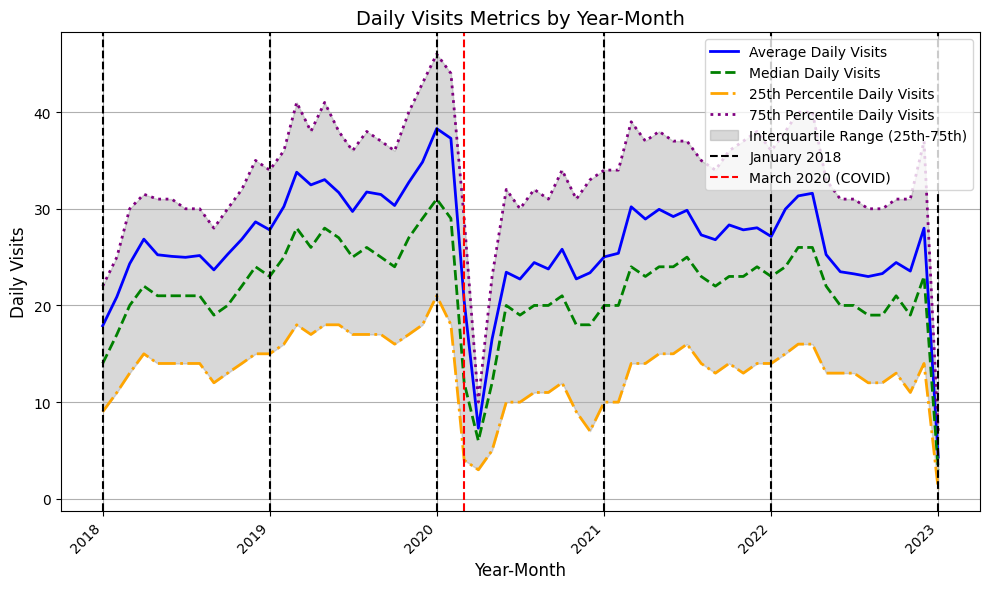

In [ ]:
# Step 1: Extract year-month from the 'date' column
long_sample['year_month'] = long_sample['date'].dt.to_period('M')

# Step 2: Calculate average, median, 25th, and 75th percentiles by year-month
dailyvisits_stats = (
    long_sample.groupby('year_month')['dailyvisits']
    .agg(
        average='mean',
        median='median',
        pct_25=lambda x: x.quantile(0.25),
        pct_75=lambda x: x.quantile(0.75)
    )
    .reset_index()
)
dailyvisits_stats['year_month'] = dailyvisits_stats['year_month'].dt.to_timestamp()

# Step 3: Plot the lines for average, median, 25th percentile, and 75th percentile
plt.figure(figsize=(10, 6))

plt.plot(
    dailyvisits_stats['year_month'],
    dailyvisits_stats['average'],
    label='Average Daily Visits',
    color='blue',
    linestyle='-',
    linewidth=2
)
plt.plot(
    dailyvisits_stats['year_month'],
    dailyvisits_stats['median'],
    label='Median Daily Visits',
    color='green',
    linestyle='--',
    linewidth=2
)
plt.plot(
    dailyvisits_stats['year_month'],
    dailyvisits_stats['pct_25'],
    label='25th Percentile Daily Visits',
    color='orange',
    linestyle='-.',
    linewidth=2
)
plt.plot(
    dailyvisits_stats['year_month'],
    dailyvisits_stats['pct_75'],
    label='75th Percentile Daily Visits',
    color='purple',
    linestyle=':',
    linewidth=2
)

# Step 4: Shade the area between the 25th and 75th percentiles
plt.fill_between(
    dailyvisits_stats['year_month'],
    dailyvisits_stats['pct_25'],
    dailyvisits_stats['pct_75'],
    color='grey',
    alpha=0.3,
    label='Interquartile Range (25th-75th)'
)

# Step 5: Add vertical lines for the start of each year and March 2020
for year in range(
    dailyvisits_stats['year_month'].dt.year.min(),
    dailyvisits_stats['year_month'].dt.year.max() + 1
):
    plt.axvline(
        pd.Timestamp(f'{year}-01-01'),
        color='black',
        linestyle='--',
        label=f'January {year}' if year == dailyvisits_stats['year_month'].dt.year.min() else ""
    )
plt.axvline(
    pd.Timestamp('2020-03-01'),
    color='red',
    linestyle='--',
    label='March 2020 (COVID)'
)

# Step 6: Customize the chart with titles, labels, and legend
plt.title('Daily Visits Metrics by Year-Month', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Daily Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Step 7: Show the plot
plt.show()



**Significant Dip and Quick Recovery:** There was a sharp drop in daily visits around March 2020 due to COVID, followed by a rapid recovery. However, post-recovery levels are slightly lower than pre-COVID levels.

**Changing Trend:** Pre-COVID daily visits showed a steady upward trend, whereas post-COVID visits have stabilized, remaining relatively flat after the initial recovery period.

Part 6: Box plot of dailyvisits by quarter



Question 6 (1 point): Draw a box plot of dailyvisits by quarter.

The horizontal axis should show quarters in your data. The chart should show one box (with whiskers) per year-quarter. If you think the chart is too crowded, you can draw the chart by half-year or year instead of quarter.
Make at least one comment about the visual pattern of dailyvisits in this chart,
Make another comment on the comparison of this chart and the line chart you have produced in Question 5c.


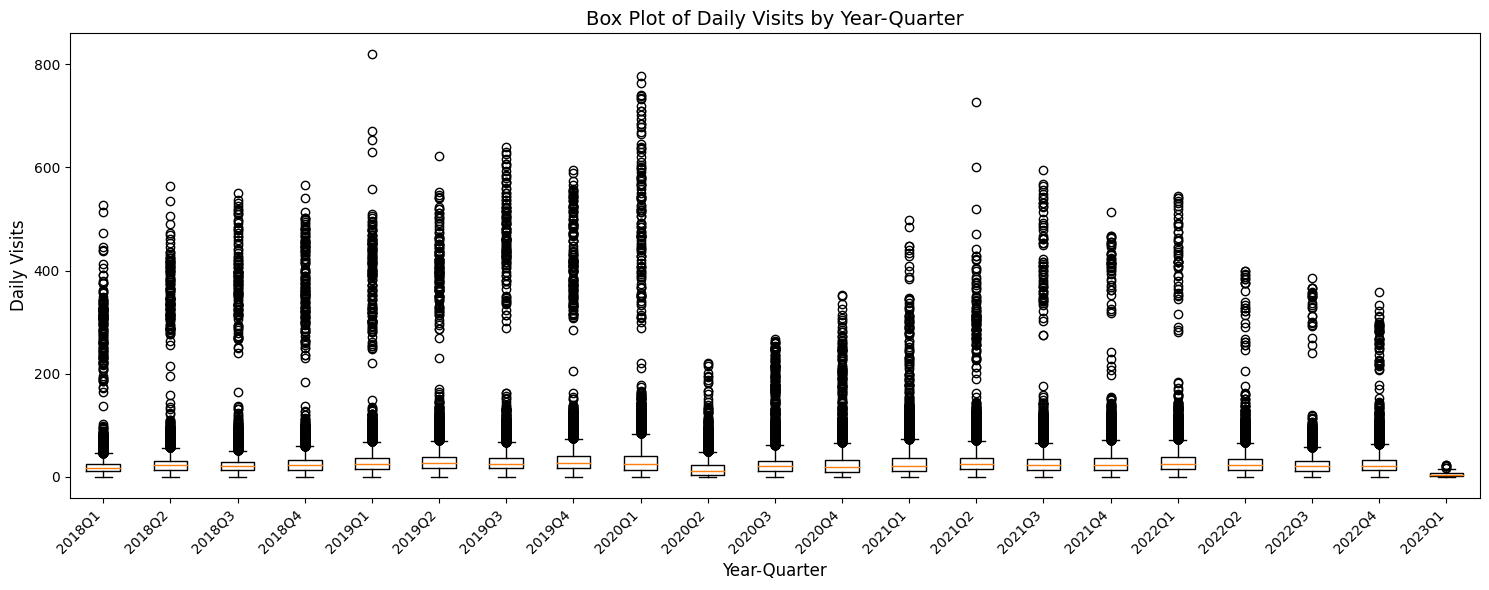

In [ ]:
# Step 1: Extract the quarter and year from the 'date' column
long_sample['year_quarter'] = long_sample['date'].dt.to_period('Q')

# Step 2: Plot a box plot of daily visits by year-quarter
plt.figure(figsize=(15, 6))
plt.boxplot(
    [
        long_sample[long_sample['year_quarter'] == quarter]['dailyvisits']
        for quarter in sorted(long_sample['year_quarter'].unique())
    ],
    labels=[str(quarter) for quarter in sorted(long_sample['year_quarter'].unique())]
)

# Step 3: Customize the plot
plt.title('Box Plot of Daily Visits by Year-Quarter', fontsize=14)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Daily Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Step 4: Show the plot
plt.show()


**Visual Pattern:**
The box plot reveals numerous outliers above the top whisker, indicating days with exceptionally high daily visits compared to the median values for each quarter. These outliers likely represent special events or promotions that attracted increased traffic.

**Comparison to Line Chart from Question 5c:**
While the line chart illustrates overall trends in daily visits, the box plot highlights the distribution and variability within each quarter. It shows that daily visits can vary significantly, revealing substantial fluctuations even when trends appear stable.

Part 7: Geographic distribution of dailyvisits

Question 7 (2 points): now that you have visualized dailyvisits over time, try to:

visualize the geographic distribution of dailyvisits in a US map.
Please comment on
(a) whether the chart passes a smell test based on some public information you have seen about your chain on the internet;
(b) what you learn from this geographic visualization; and
(c) how it may help a particular business decision inside your restaurant chain.

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


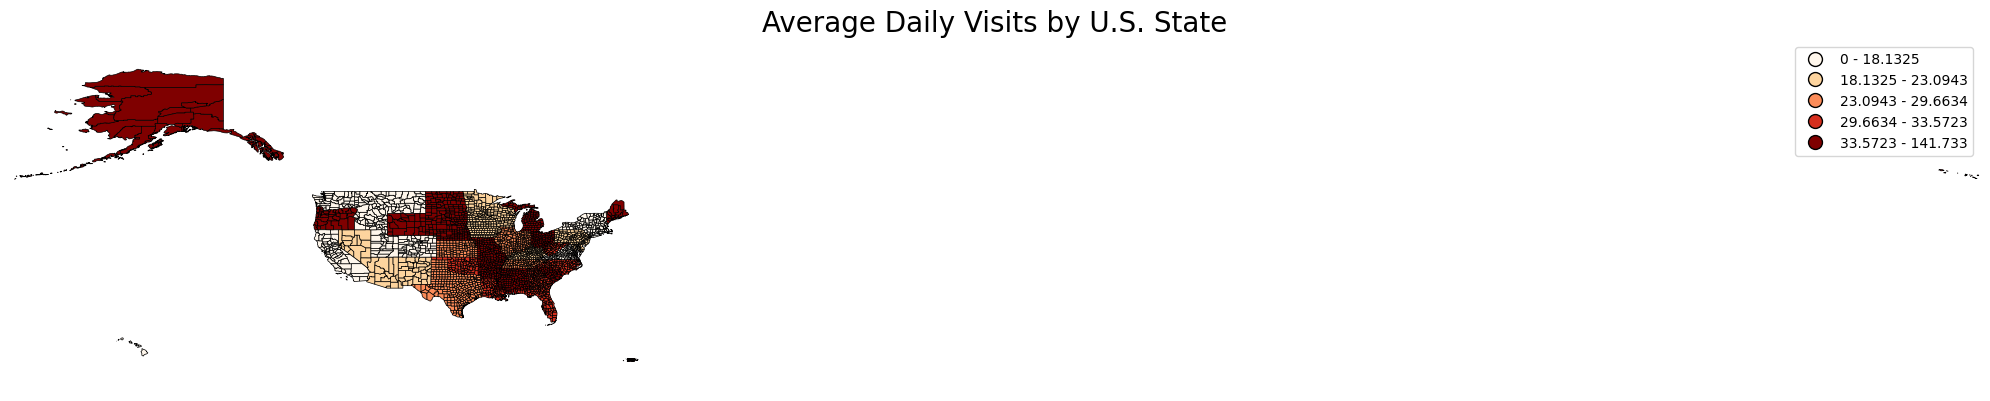

In [ ]:
# Step 1: Install and import necessary libraries
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc

# Step 2: Load US state-level boundaries data (you can use counties if needed)
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

geoData = geoData.explode()  # In case there are MultiPolygons

# Step 4: Aggregate daily visits by state
df_state = (
    long_sample[['region', 'dailyvisits']]
    .groupby(['region'])
    .mean()
    .reset_index()
)

# Step 5: Create state_code mapping for merging
state_id = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06',
    'CO': '08', 'CT': '09', 'DE': '10', 'FL': '12', 'GA': '13',
    'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24',
    'MA': '25', 'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29',
    'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34',
    'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45',
    'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50',
    'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56'
}

df_state['state_code'] = df_state['region'].map(state_id)

# Step 6: Merge geoData with df_state based on state_code
fullData = pd.merge(
    geoData,
    df_state,
    left_on='STATE',
    right_on='state_code',
    how='left'
)

# Step 7: Plot a choropleth map of average daily visits by state
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # Increase figure size

# Use mapclassify to classify the data into quantiles
scheme = mc.Quantiles(fullData['dailyvisits'].dropna(), k=5)

# Plot the map
gplt.choropleth(
    fullData,
    hue='dailyvisits',
    linewidth=.5,
    cmap='OrRd',  # Color scheme
    legend=True,
    edgecolor='black',
    scheme=scheme,
    ax=ax
)

# Step 8: Customize the plot with title
ax.set_title('Average Daily Visits by U.S. State', fontsize=20)  # Increase font size for title
ax.set_xticks([])  # Optionally remove x-ticks for a cleaner look
ax.set_yticks([])  # Optionally remove y-ticks for a cleaner look
plt.grid(False)  # Optionally remove grid lines
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()




(a) Smell Test:
The map makes sense based on what I know about the chain. In my data I know there weren't chains in the west coast regions present which is what is show on the map.

(b) Insights:
I can see clear patterns in customer traffic. We have a lot of daily visits on the east coast and southeast areas like Florida. This helps identify where we’re doing well and where we might need to boost our presence.

(c) Business Decisions:
This visualization can guide decisions on marketing and expansion. If a region has low visits, we could run promotions or consider opening new locations there. It helps us focus our efforts where they’ll be most effective.